> To live! like a tree alone and free,
> and like a forest in brotherhood/sisterhood...
> Nazim Hikmet

<center> <h1> Random Forests (Yes! No Forest Image) </h1> </center>



## Objectives

- Review of decision trees

- Defining Bootstrapping process

- Explaining the need for bootstrapping

- Identifying the need for bootstrapping for decision trees.

- Comparing Random forests and bagging methods

- Evaulating a model by random forest model

<center> <h1> Bootstrapping </h1> </center>

<img src= "img/bootstrapping2.jpg" style="height:400px">

Consider a case that we want to invest to either X or Y a fixed amount of money.

- $\alpha$ amount to X and $1- \alpha$ amount to Y

- We want to minimize variance in our investment! This is minimize $V(\alpha X + (1-\alpha )Y)$

- The $\alpha$ that minimizes the variance: 

$$ \alpha = \frac{\sigma^{2}_{Y} - \sigma_{XY}}{\sigma_{X}^{2} + \sigma^{2}_{Y} - 2\sigma_{XY}}$$

where $\sigma_{XY}$ is the covariance of X and Y. 

Q: Do you see the problem here?

Hint: Let's rewrite the equation with hats! What are the hats refering to ?


$$ \widehat{\alpha}= \frac{\widehat{\sigma}^{2}_{Y} - \widehat{\sigma}_{XY}}{\widehat{\sigma}_{X}^{2} + \widehat{\sigma}^{2}_{Y} - 2\widehat{\sigma}_{XY}}$$

Q: How much do we certain about $\widehat{\alpha}$?

In [1]:
import numpy as np 


In [2]:
a = (1.25-0.5)/(1+1.25-(2*.5))

In [3]:
a

0.6

In [4]:
sample = np.random.multivariate_normal(mean = [10,10], cov = [[1, 0.5], [0.5, 1.25]] , size = 100)


In [5]:
sample

array([[10.23500355,  9.73750164],
       [10.73542166, 11.58394115],
       [10.47735828, 11.53674899],
       [10.28703746,  8.7175607 ],
       [ 9.06503   , 10.16143512],
       [ 9.54388614,  9.66834494],
       [12.35108295, 12.45662267],
       [12.59379253, 11.85335903],
       [ 9.55715325,  9.39127472],
       [10.11045713, 10.0007949 ],
       [10.87211483, 10.16262166],
       [10.27799138, 10.15749378],
       [12.66501859, 11.07920284],
       [ 9.36387253,  9.47976671],
       [ 7.65783794,  7.95098868],
       [10.87313881, 10.23828995],
       [ 9.2517671 , 11.38886108],
       [ 8.78437743,  9.53577354],
       [10.40605805,  8.35453456],
       [10.35940218, 10.10378473],
       [ 9.62957785, 10.31536993],
       [10.34242782,  9.1895836 ],
       [10.44663741, 11.51225188],
       [ 9.41011697,  9.59035422],
       [10.05820765, 10.94223128],
       [10.08735093, 10.21606196],
       [10.37846269,  7.94101956],
       [ 9.66318685,  7.67378631],
       [10.98076486,

In [6]:
sample[:,0].var()

0.7573475663801302

In [7]:
sample[:, 1].var()

1.196152737356418

In [8]:
np.cov(sample.T)[0,1]

0.4815655164333491

In [9]:
sigma_x = sample[:,0].var()

sigma_y = sample[:, 1].var()

sigma_xy = np.cov(sample.T)[0,1]

print(np.cov(sample.T))

alpha_hat = (sigma_y - sigma_xy)/(sigma_x + sigma_y - 2* sigma_xy)

print(alpha_hat)

[[0.76499754 0.48156552]
 [0.48156552 1.20823509]]
0.7215361400454606


In [32]:
alphas = []

for i in range(1000):
    s = np.random.multivariate_normal(mean = [10,10], cov = [[1, 0.5], [0.5, 1.25]] , size = 100)
    s_x = s[:,0].var()
    s_y = s[:,1].var()
    s_xy = np.cov(s.T)[0,1]
    a_hat = (s_y - s_xy)/(s_x + s_y - 2* s_xy)
    alphas.append(a_hat)
    


In [33]:
import matplotlib.pyplot as plt

(array([  7.,  22., 104., 242., 281., 198., 113.,  28.,   2.,   3.]),
 array([0.33508567, 0.39444553, 0.45380539, 0.51316526, 0.57252512,
        0.63188498, 0.69124484, 0.7506047 , 0.80996456, 0.86932442,
        0.92868428]),
 <a list of 10 Patch objects>)

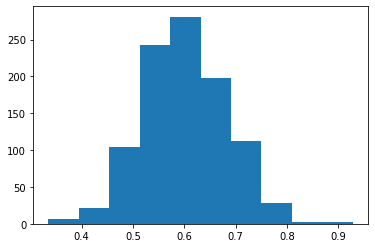

In [34]:
plt.hist(alphas)

In [13]:
np.std(alphas, ddof=1)

0.0829659253366882

In [ ]:
# find the mean of the alphas
# find the standard error of alphas - note that the degree of freedom is 1 in this case

Q: what is wrong with this approach?

A: What can we do about this -- Bootstapping 


In [15]:
## Bootstrapping

boot_sample = sample[np.random.choice(np.arange(100), replace = True, size = 100)]

np.unique(boot_sample, return_counts= True, axis = 0)[1]

## Homework: find alpha_hats with bootstrapping

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1, 2, 3, 2, 1,
       1, 2, 1, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1,
       3, 1, 1, 2, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 2, 3, 1, 1, 1, 1,
       2], dtype=int64)

In [28]:
alphas = []

for i in range(1000):
    s = sample[np.random.choice(np.arange(100), replace = True, size = 100)]
    s_x = s[:,0].var()
    s_y = s[:,1].var()
    s_xy = np.cov(s.T)[0,1]
    a_hat = (s_y - s_xy)/(s_x + s_y - 2* s_xy)
    alphas.append(a_hat)
    

In [29]:
np.mean(alphas)

0.7242864112382823

In [30]:
np.std(alphas, ddof=1)

0.08710472866534737

(array([  2.,  19.,  68., 168., 224., 232., 182.,  78.,  22.,   5.]),
 array([0.43424769, 0.49125184, 0.54825599, 0.60526015, 0.6622643 ,
        0.71926845, 0.77627261, 0.83327676, 0.89028091, 0.94728507,
        1.00428922]),
 <a list of 10 Patch objects>)

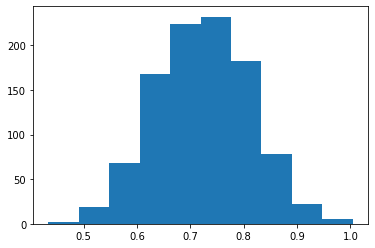

In [31]:
plt.hist(alphas)

<img src= "img/bootstrap1.png" style="height:400px">


### Bagging


Let's us one more time recall that if $Z_{1}, \cdots, Z_{n}$ are independent observations with variance $\sigma^{2}$ then the variance of the mean $\bar{Z}$ is given by $\frac{\sigma^{2}}{n}$. 

So what?

We will use this idea calculate $$ \hat{f}^{1}(x), \cdots, \hat{f}^{B}(x)$$ where each $\hat{f}^{i}$ represents a decision tree fitted to the bootstrapped data.


Then we will make a prediction by: 

$$ \hat{f}_{\text{avg}}(x) = \frac{1}{B}\sum_{b=1}^{B} \hat{f}^{b}(x)$$

Note that this is for regression and for the classification we can get majority vote.

__Problem__ We still have some problem with this approach and random forests will address this problem. Can you see the issue?

- If we have a strong predictor then this will dominate in each tree.





Bagging helps with high-variance. It is not necessary with linear regression, because linear regression has low variance and high bias.

In [46]:
import pandas as pd

In [54]:
## you can download the data from -- https://www.kaggle.com/ishaanv/ISLR-Auto#Heart.csv

## or http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
heart = pd.read_csv('data\Heart.csv')

In [55]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Unnamed: 0    303 non-null int64
Age           303 non-null int64
Sex           303 non-null int64
ChestPain     303 non-null object
RestBP        303 non-null int64
Chol          303 non-null int64
Fbs           303 non-null int64
RestECG       303 non-null int64
MaxHR         303 non-null int64
ExAng         303 non-null int64
Oldpeak       303 non-null float64
Slope         303 non-null int64
Ca            299 non-null float64
Thal          301 non-null object
AHD           303 non-null object
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [56]:
heart.dropna(axis= 0, how= 'any', inplace = True)

y = heart.AHD

heart.drop(columns= 'AHD', inplace = True)

In [57]:
X = pd.get_dummies(heart)

In [1]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestClassifier()

In [60]:
rfc = RandomForestClassifier(n_estimators=300, max_features= 'sqrt', max_depth= 7,  oob_score=True)

In [61]:
from sklearn.model_selection import cross_validate

In [62]:
cv = cross_validate(rfc, X, y, return_estimator=True, cv=5)

In [63]:
cv['test_score']

array([0.81666667, 0.9       , 0.77966102, 0.79661017, 0.79661017])

In [64]:
est = cv['estimator'][3]

In [65]:
est.oob_score_

0.8319327731092437

In [66]:
est.feature_importances_

index = X.columns.tolist()

In [67]:
feat_imp = pd.DataFrame(est.feature_importances_, index = index, columns = ['importances'])

In [68]:
feat_imp.sort_values(by = 'importances', ascending = False)

,importances
Thal_normal,0.121308
Ca,0.112431
Oldpeak,0.100405
Thal_reversable,0.085313
ChestPain_asymptomatic,0.084279
MaxHR,0.078986
Age,0.075522
RestBP,0.063471
Unnamed: 0,0.058992
Chol,0.056464


### Extra Material 

- [On the variance](https://newonlinecourses.science.psu.edu/stat414/node/167/)

- [Discussion on Random Forests and overfitting](https://en.wikipedia.org/wiki/Talk%3ARandom_forest)

- [Tricky stuff with respect to feature importance](http://rnowling.github.io/machine/learning/2015/08/10/random-forest-bias.html)

- [ISLR - section 8.2](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)